# Surat Flats Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Load the Dataset

In [2]:
df = pd.read_csv(r"surat_uncleaned.csv")

In [3]:
df.shape

(4525, 11)

In [4]:
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [6]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64

In [8]:
df.describe().T

,count,unique,top,freq
property_name,4525,1992,3 BHK Apartment for Sale in Vesu Surat,93
areaWithType,4525,6,Super Area,2599
square_feet,4525,1399,1000 sqft,77
transaction,4421,38,Resale,2197
status,4524,138,Ready to Move,3078
floor,4480,222,Resale,431
furnishing,4185,78,Unfurnished,2322
facing,3936,176,East,1487
description,3154,2588,Multistorey apartment is available for sale. I...,35
price_per_sqft,4157,2134,"₹6,000 per sqft",64


In [9]:
df["square_feet"].unique()

array(['644 sqft', '1278 sqft', '1173 sqft', ..., '2545 sqft',
       '5175 sqft', '2620 sqft'], dtype=object)

#### Clean `price` Column

In [10]:
def convert_price(value):
    if pd.isna(value):
        return np.nan
    value = str(value).lower()
    value = value.replace("₹", "").replace(",", "").strip()
    if 'cr' in value:
        return float(value.replace("cr", "").strip()) * 10000000
    elif 'lac' in value:
        return float(value.replace("lac", "").strip()) * 100000
    else:
        try:
            return float(value)
        except:
            return np.nan

In [11]:
df['price'] = df['price'].apply(convert_price)

In [13]:
df[["price"]].head()

,price
0,3380000.0
1,4540000.0
2,4460000.0
3,4700000.0
4,4500000.0


#### Clean the `square_feet` Column

In [14]:
def convert_area(area_str):
    if pd.isna(area_str):
        return np.nan
    area_str = area_str.lower().replace(",", "").strip()
    
    try:
        if "sqft" in area_str:
            return float(area_str.replace("sqft", "").strip())
        elif "sqm" in area_str:
            return float(area_str.replace("sqm", "").strip()) * 10.7639
        elif "sqyrd" in area_str:
            return float(area_str.replace("sqyrd", "").strip()) * 9
        elif "rood" in area_str:
            return float(area_str.replace("rood", "").strip()) * 10890
        else:
            return float(area_str)
    except:
        return np.nan

In [15]:
df["square_feet"] = df["square_feet"].apply(convert_area)

In [16]:
df[["square_feet"]].head()

,square_feet
0,644.0
1,1278.0
2,1173.0
3,700.0
4,1250.0


In [17]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          9
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price              173
dtype: int64

#### Drop Rows with Invalid Values

In [18]:
df = df.dropna(subset = ["square_feet"])

####  Drop the Unnecessary Column

In [19]:
df = df.drop(["furnishing", "facing", "description"], axis = 1, errors = "ignore")

#### Remove Duplicates

In [20]:
df.duplicated().sum()

131

In [21]:
df.drop_duplicates(keep=False,inplace=True)

#### Feature Engineering

In [22]:
df["price_per_sqft"] = df["price"] / df["square_feet"]

In [23]:
df[["price_per_sqft","price"]].head()

,price_per_sqft,price
0,5248.447205,3380000.0
1,3552.425665,4540000.0
2,3802.216539,4460000.0
3,6714.285714,4700000.0
4,3600.000000,4500000.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4254 entries, 0 to 4524
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4254 non-null   object 
 1   areaWithType    4254 non-null   object 
 2   square_feet     4254 non-null   float64
 3   transaction     4158 non-null   object 
 4   status          4254 non-null   object 
 5   floor           4210 non-null   object 
 6   price_per_sqft  4083 non-null   float64
 7   price           4083 non-null   float64
dtypes: float64(3), object(5)
memory usage: 299.1+ KB


#### Remove Outliers in `price_per_sqft`

In [25]:
# Calculate Q1 and Q3 (25th and 75th percentiles)
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows within bounds (remove outliers)
df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

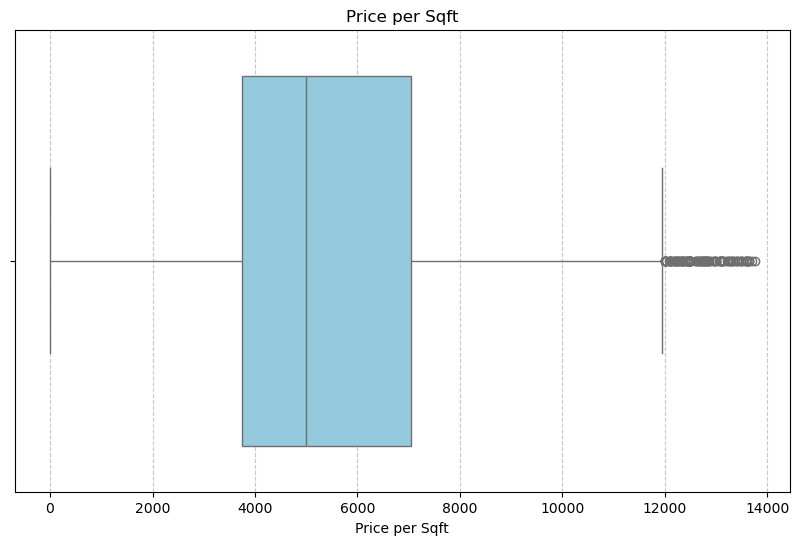

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = df["price_per_sqft"], color = "skyblue")
plt.title("Price per Sqft")
plt.xlabel("Price per Sqft")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Data Visualizatiom

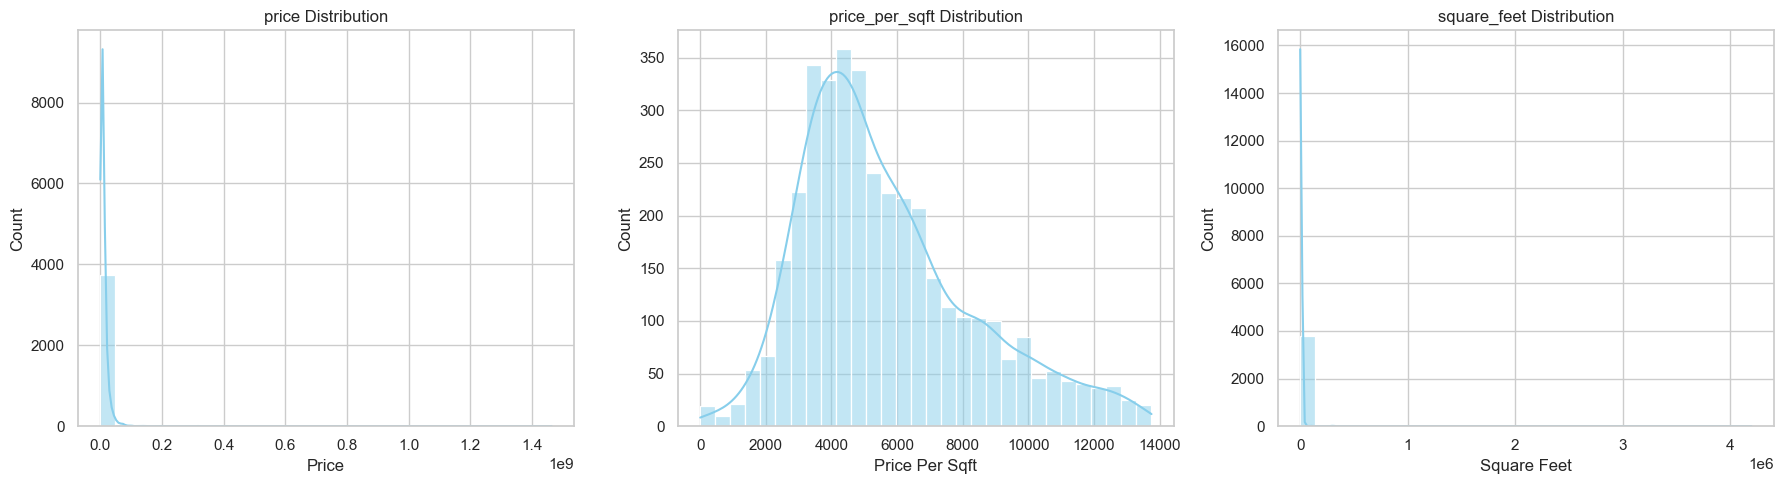

In [28]:
# Specify numeric columns
numeric_cols = ["price", "price_per_sqft", "square_feet"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Plot histograms with KDE for each numeric column
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"{col} Distribution")
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3813 entries, 0 to 4517
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   3813 non-null   object 
 1   areaWithType    3813 non-null   object 
 2   square_feet     3813 non-null   float64
 3   transaction     3733 non-null   object 
 4   status          3813 non-null   object 
 5   floor           3774 non-null   object 
 6   price_per_sqft  3813 non-null   float64
 7   price           3813 non-null   float64
dtypes: float64(3), object(5)
memory usage: 268.1+ KB


#### `One-Hot Encode` Categorical Columns

In [30]:
cat_cols = ["property_name", "areaWithType", "transaction", "status", "floor"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [31]:
df.isnull().sum()

square_feet                                        0
price_per_sqft                                     0
price                                              0
property_name_  Land for Sale in Bardoli Surat     0
property_name_  Land for Sale in Katargam Surat    0
                                                  ..
floor_Upper Basement out of 12                     0
floor_Upper Basement out of 14                     0
floor_Upper Basement out of 3                      0
floor_Upper Basement out of 5                      0
floor_Yes                                          0
Length: 2087, dtype: int64

#### Model Evaluation

In [33]:
# Define features (X) and target (y) from the DataFrame
X = df.drop('price', axis=1)
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 222900323936778.34
R-squared (R2): 0.92
